<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/TCCfinalimport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcci.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['i'] = dfa['i']
df['i'] = pd.to_numeric(df['i'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)


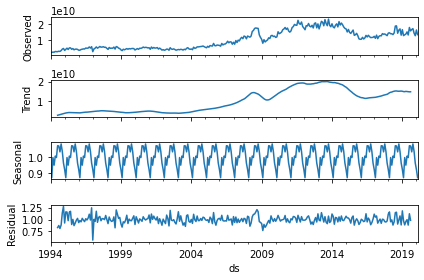

In [3]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

In [4]:
df.tail(30)

,y
ds,
2017-09-01,13488327247
2017-10-01,13678843512
2017-11-01,13142506475
2017-12-01,12597515273
2018-01-01,14202766580
2018-02-01,14411341031
2018-03-01,13808687820
2018-04-01,13792173075
2018-05-01,13260789020


In [5]:
df.dtypes

y    int64
dtype: object

In [6]:
print(df.shape)

(314, 1)


In [7]:
df.describe()

,y
count,3.140000e+02
mean,9.892423e+09
std,5.810019e+09
min,1.768675e+09
25%,4.618011e+09
50%,8.533477e+09
75%,1.460153e+10
max,2.304960e+10


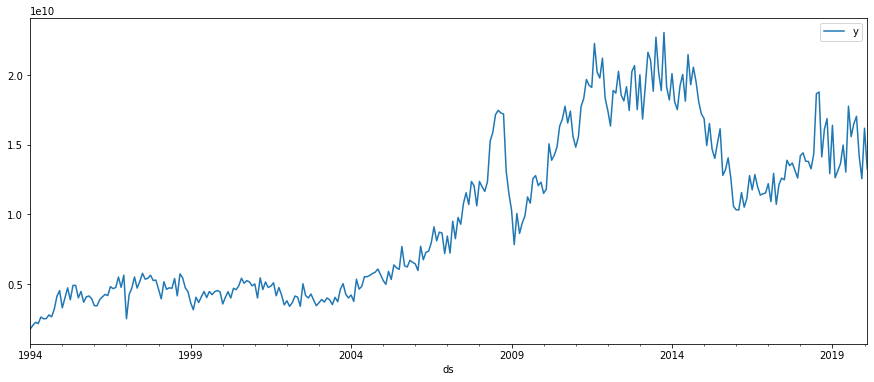

In [8]:
df.plot(figsize=(15,6))

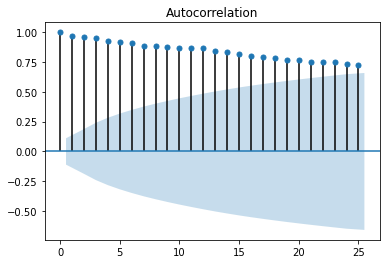

In [10]:
plot_acf(df)
plt.show()

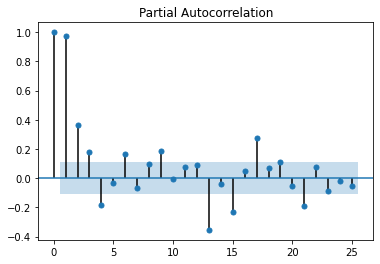

In [11]:
plot_pacf(df)
plt.show()

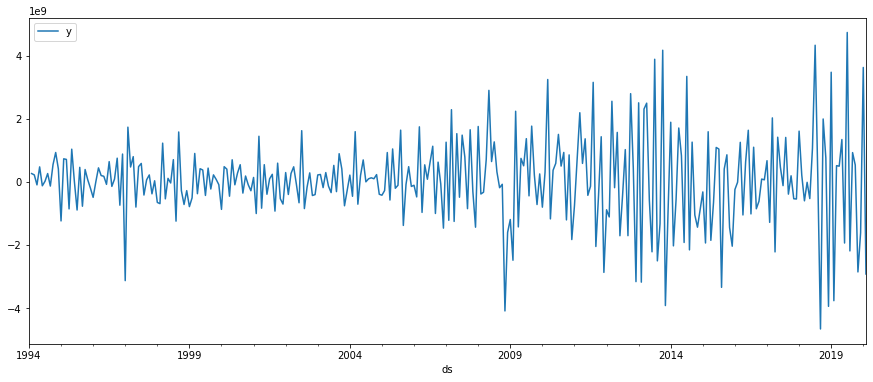

In [12]:
df.diff().plot(figsize=(15,6))

In [13]:
arima = ARIMA(df, freq='MS', order=(5,1,2)).fit()
(arima.resid ** 2).mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1.3380494523057116e+18

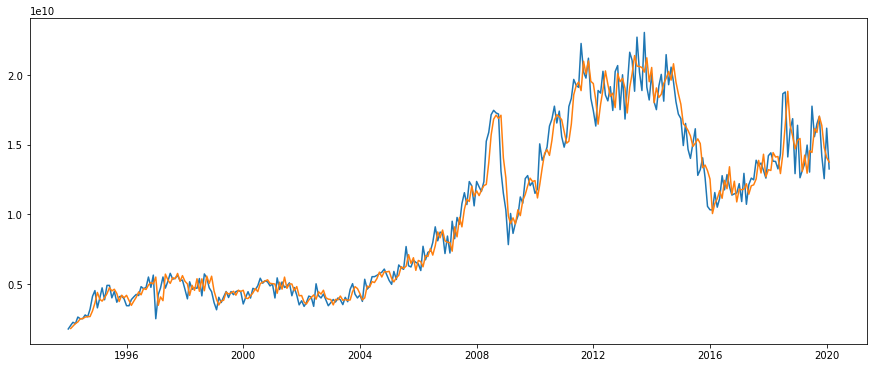

In [14]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(arima.predict(typ='levels'))

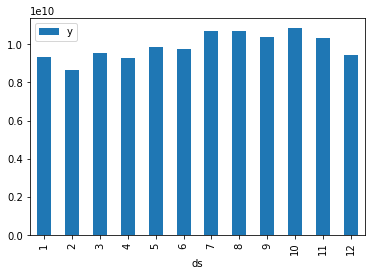

In [15]:
df.groupby(df.index.month).mean().plot(kind='bar')